# Age Estimation 

In [1]:
import numpy as np
import os
from helperP import *

# Loading Data

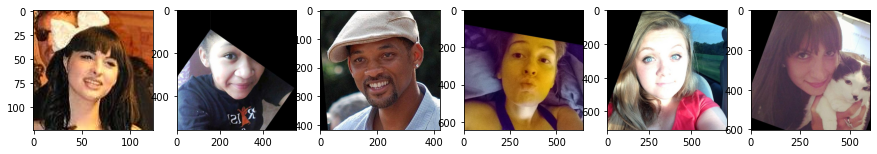

In [2]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [3]:
def closed_form_solution(age, features):
    # 预处理
    H = features
    ones = np.ones(len(H))          # 获得和输入特征组数量相同的全1向量
    H = np.column_stack((ones,H))   # 将全1向量添加到输入特征组中
    Y = age
    
    ##########################################################################
    # TODO: YOUR CODE HERE
    ########################################################################## 
    
    # 计算解析解
    weights = np.linalg.inv(H.T.dot(H)).dot(H.T).dot(Y)

    # 分离权重和偏差
    bias = weights[0]
    weights = weights[1:]
    
    return weights, bias


# Validate

Your validate loss is: 67.84


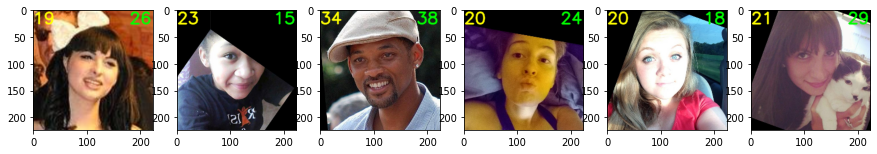

In [4]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [5]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])


Test results has saved to cfs.txt
[[28.04639964]
 [60.90374513]
 [55.1959496 ]
 [23.35683529]
 [35.20122174]
 [34.36335499]
 [36.63257242]
 [44.11504391]
 [18.49147778]
 [57.60077168]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [6]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # 初始化参数
    weights = np.random.randn(2048, 1)
    bias = np.random.randn(1, 1)
    age = np.row_stack(age)
    
    # 学习率
    lr = 10e-3
    # 动量系数
    alpha = 0.25
    
    momentum = None
    
    # 学习周期
    epoch = 300
    
    N = len(age)
    # 迭代
    for e in range(epoch):
        ##########################################################################
        # TODO: YOUR CODE HERE
        ########################################################################## 

        # forward pass
        pre_age = np.dot(feature, weights) + bias
        # calculate loss
        loss = np.dot((pre_age-age).T,(pre_age-age))[0][0]  
        # calculate gradient
        gra_w = 2*np.dot(feature.T,(pre_age-age))
        gra_b = 2*np.sum(pre_age-age)
        # update weights
        if not e:
            momentum = lr/N*np.row_stack((gra_b,gra_w))
        else:
            momentum = alpha*lr/N*np.row_stack((gra_b,gra_w))+(1-alpha)*momentum
             # You can also consider the gradient descent with momentum
        bias -= momentum[0]
        weights -= momentum[1:]
    return weights, bias

# Train and validate

Your validate score is: 64.273


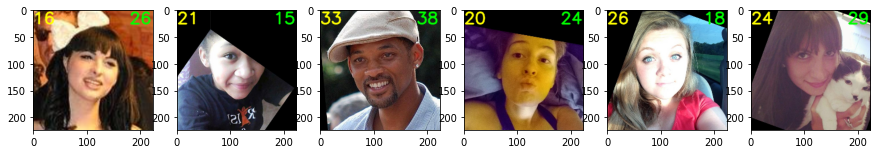

In [7]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))   

#  Test and Generate results file

In [8]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[26.85470972]
 [76.53451898]
 [51.99523223]
 [21.37124674]
 [33.09449372]
 [31.27820515]
 [30.46648005]
 [41.5435171 ]
 [22.11736083]
 [53.03384263]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [9]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.rand(2048, 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-3
    alpha = 1

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size
    
    epoch_sgd = 300

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
            batch_age = np.row_stack(batch_age)
            ##########################################################################
            # TODO: YOUR CODE HERE
            ########################################################################## 
            # forward pass
            pre_age = np.dot(batch_feature,weights) + bias
            # calculate loss
            loss = (batch_feature.dot(weights)+bias - batch_age).T.dot((batch_feature.dot(weights)+bias - batch_age))[0][0]
            # calculate gradient 
            gra_w = 1/batch_size*(pre_age-batch_age).T.dot(batch_feature).T
            gra_b = 1/batch_size*np.sum(pre_age-batch_age)
            # update weights
            if not m:
                momentum = lr/batch_size*np.row_stack((gra_b,gra_w))
            else:
                momentum = alpha*lr/batch_size*np.row_stack((gra_b,gra_w))+(1-alpha)*momentum
            weights -= momentum[1:]
            bias -= momentum[0]
        print('=> epoch:', e + 1, '  Loss:', round(loss,4))
    return weights, bias

# Train and validate

=> epoch: 1   Loss: 1622.2404
=> epoch: 2   Loss: 830.7902
=> epoch: 3   Loss: 359.798
=> epoch: 4   Loss: 457.0949
=> epoch: 5   Loss: 334.2206
=> epoch: 6   Loss: 514.1612
=> epoch: 7   Loss: 313.4069
=> epoch: 8   Loss: 410.2027
=> epoch: 9   Loss: 805.9427
=> epoch: 10   Loss: 308.3293
=> epoch: 11   Loss: 447.7832
=> epoch: 12   Loss: 556.1978
=> epoch: 13   Loss: 394.5141
=> epoch: 14   Loss: 279.0033
=> epoch: 15   Loss: 227.2829
=> epoch: 16   Loss: 856.6983
=> epoch: 17   Loss: 514.3497
=> epoch: 18   Loss: 240.3543
=> epoch: 19   Loss: 409.3429
=> epoch: 20   Loss: 499.9582
=> epoch: 21   Loss: 351.3222
=> epoch: 22   Loss: 310.0527
=> epoch: 23   Loss: 1069.3
=> epoch: 24   Loss: 460.0935
=> epoch: 25   Loss: 294.6435
=> epoch: 26   Loss: 151.2365
=> epoch: 27   Loss: 548.5589
=> epoch: 28   Loss: 469.5884
=> epoch: 29   Loss: 488.3959
=> epoch: 30   Loss: 174.4077
=> epoch: 31   Loss: 861.7937
=> epoch: 32   Loss: 351.8149
=> epoch: 33   Loss: 183.9929
=> epoch: 34   Loss: 

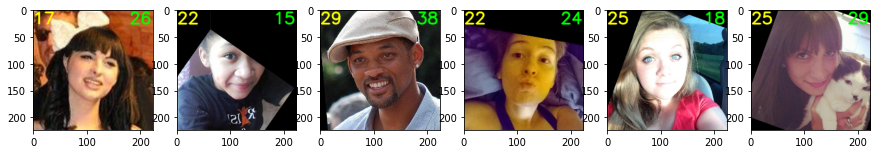

In [10]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [11]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[26.92212681]
 [73.04948718]
 [48.20716156]
 [22.63034955]
 [34.95028173]
 [32.0055684 ]
 [34.94251547]
 [41.64991042]
 [21.94266876]
 [54.85262702]]
